<a href="https://colab.research.google.com/github/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/EnP_training/session5_welltest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Well Test Modeling and Analysis with Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 808 (delta 79), reused 0 (delta 0), pack-reused 658
Receiving objects: 100% (808/808), 24.03 MiB | 16.56 MiB/s, done.
Resolving deltas: 100% (433/433), done.


In [ ]:
import sys
sys.path.append('/content/pyreservoir/welltest')

In [ ]:
# import functions for well test modeling and analysis
from wellflo import * # import all functions
from wellanalysis import constant_rate_drawdown_test, constant_rate_buildup_test

## Functions

In [ ]:
def datetime_to_days(t):
  """
  Convert list of datetimes to days from 0 to N

  Input:

  t is the datetime in dataframe format
  """
  import datetime

  # subtract one datetime to another datetime
  timedelta = [j-i for i, j in zip(t[:-1], t[1:])]
  timedelta = np.array(timedelta)
  timedelta = timedelta / datetime.timedelta(days=1)

  # take cumulative sum over timedeltas
  t = np.cumsum(timedelta)
  t = np.append(0, t)
  t = t.astype(float)

  return t

## Modeling a Multirate Test

We want to model how the pressure transient response of a well is if we conduct a series of rate-changing test (or we call as: multirate test). The following is the series of rate we want to model.

|Hours|Rate (STB/D)|
|:--:|:--:|
|$$0 < t \leq 10$$|1,000|
|$$10 < t \leq 20$$|2,000|
|$$20 < t \leq 30$$|3,000|
|$$30 < t \leq 45$$|1,500|
|$$45 < t \leq 65$$|0|
|$$65 < t \leq 70$$|1,000|

Reservoir rock and fluid properties:
* Reservoir initial pressure 2,500 psia
* Porosity 15%
* Total compressibility 12 microsip
* Permeability 600 md
* Radius of wellbore 4 inch (1 inch = 0.0833 ft)
* Reservoir thickness 32 ft
* Oil viscosity 2 cp
* Distance from wellbore to reservoir outer boundary 3,000 ft 
* Oil FVF 1.33 RB/STB

First we want to plot the rates.

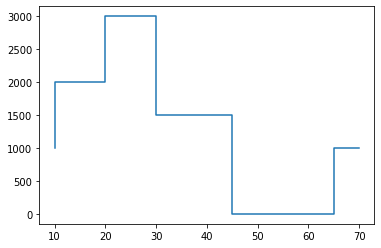

In [ ]:
# plot the rate: use plt.step
t_change = np.array([10, 20, 30, 45, 65, 70])
q_change = np.array([1000, 2000, 3000, 1500, 0, 1000])

plt.step(t_change, q_change)
plt.show()

In [ ]:
# Inputs
poro = 0.15 # Porosity
ct = 12E-6 # Total compressibility, sip
perm = 600 # Permeability, md
rw = 4 * .08333 # Radius of wellbore, convert inch to ft
h = 32 # Reservoir thickness, ft
mu = 2 # Oil viscosity, cp
re = 3000 # Distance from centre of wellbore to outer reservoir boundary, ft
Bo = 1.333 # Oil FVF, RB/STB

p_initial = 2500 # Initial pressure, psia

Before we do modeling, we need to know how much time until the flow behaves finite-acting (or we call as finite-acting time)

In [ ]:
# we use "time_finite_acting" function. See help first
help(time_finite_acting)

Help on function time_finite_acting in module wellflo:

time_finite_acting(perm, poro, mu, ct, rw, re)
    Calculate time at flow starts behaving infinite-acting



In [ ]:
# calculate finite-acting time
t_finite = time_finite_acting(perm, poro, mu, ct, rw, re)
t_finite = np.round(t_finite, 3) # round to 3 decimal places

print('Finite-acting time is {} hours'.format(t_finite))

Finite-acting time is 51.195 hours


Finally, we do modeling. 


In [ ]:
# we use "simulate_multirate_test" function. See help first
help(simulate_multirate_test)

Help on function simulate_multirate_test in module wellflo:

simulate_multirate_test(p_initial, t_step, t_change, q_change, re, rw, perm, poro, mu, ct, Bo, h)
    Simulate the Multiple Constant Rate Test Started from 0th Hour 
    Based on Superposition Principle



We need to specify the time steps. Smaller timestep will result a better result, but requires more time to compute. Here we'll use timestep of 0.1 hour, that is enough.

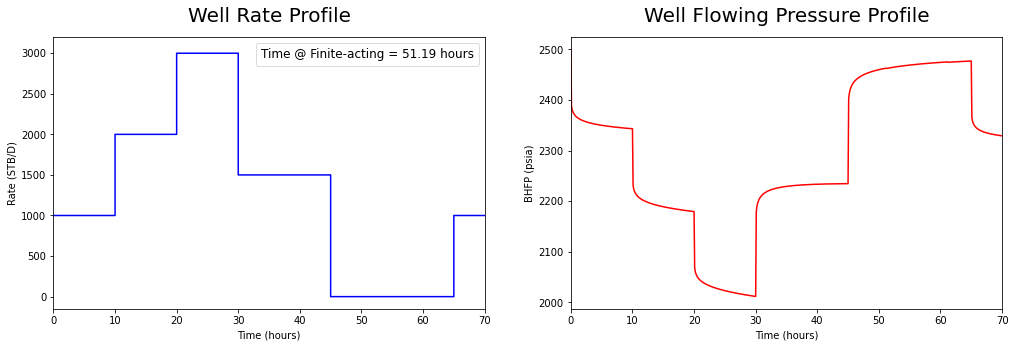

In [ ]:
# specify time step
t_step = 0.1

simulate_multirate_test(p_initial, t_step, t_change, q_change, 
                        re, rw, perm, poro, mu, ct, Bo, h)

Now, change the porosity, permeability, compressibility, viscosity, reservoir size, and oil FVF. See their effects on the finite-acting time and the pressure transient profile. Make the following cell your playground! 

Finite-acting time is 273.038 hours


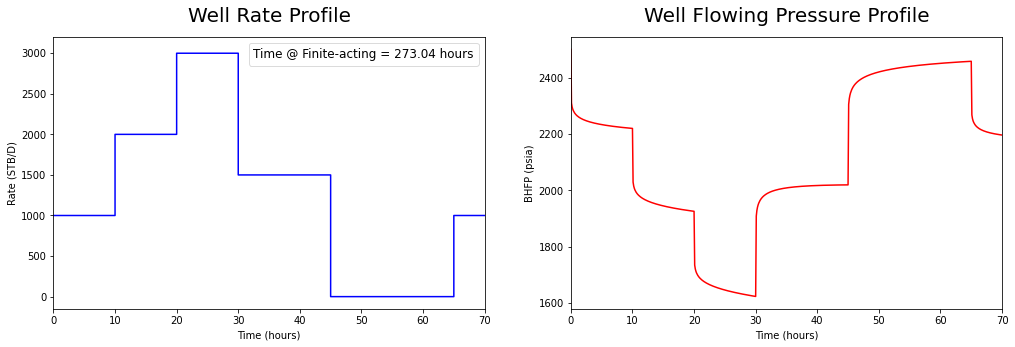

In [ ]:
# Inputs
poro = 0.4 # Porosity
ct = 12E-6 # Total compressibility, sip
perm = 300 # Permeability, md
rw = 4 * .08333 # Radius of wellbore, convert inch to ft
h = 32 # Reservoir thickness, ft
mu = 2 # Oil viscosity, cp
re = 3000 # Distance from centre of wellbore to outer reservoir boundary, ft
Bo = 1.33 # Oil FVF, RB/STB

p_initial = 2500 # Initial pressure, psia

# calculate finite-acting time
t_finite = time_finite_acting(perm, poro, mu, ct, rw, re)
t_finite = np.round(t_finite, 3) # round to 3 decimal places

print('Finite-acting time is {} hours'.format(t_finite))

# specify time step
t_step = 0.1

simulate_multirate_test(p_initial, t_step, t_change, q_change, 
                        re, rw, perm, poro, mu, ct, Bo, h)

## Modeling a Multiple Pressure Test

We want to model how the rate transient response of a well is if we conduct a series of pressure-changing test (or we call as: multiple pressure test). The following is the series of rate we want to model.

|Hours|BHFP (psia)|
|:--:|:--:|
|$$0 < t \leq 20$$|1,500|
|$$10 < t \leq 40$$|1,200|
|$$20 < t \leq 60$$|1,000|
|$$30 < t \leq 80$$|1,400|
|$$45 < t \leq 100$$|1,600|
|$$65 < t \leq 120$$|1,000|

We use the same property as before. Reservoir rock and fluid properties:
* Reservoir initial pressure 2,500 psia
* Porosity 15%
* Total compressibility 12 microsip
* Permeability 600 md
* Radius of wellbore 4 inch (1 inch = 0.0833 ft)
* Reservoir thickness 32 ft
* Oil viscosity 2 cp
* Distance from wellbore to reservoir outer boundary 3,000 ft 
* Oil FVF 1.33 RB/STB

First we want to plot the BHFP (borehole flowing pressure)

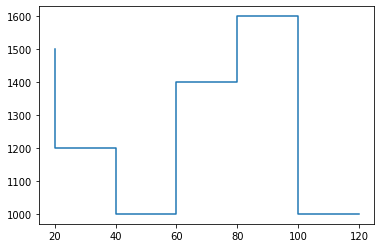

In [ ]:
# plot the pressure: use plt.step
t_change = np.array([20, 40, 60, 80, 100, 120])
p_change = np.array([1500, 1200, 1000, 1400, 1600, 1000])

plt.step(t_change, p_change)
plt.show()

In [ ]:
# Inputs
poro = 0.15 # Porosity
ct = 12E-6 # Total compressibility, sip
perm = 600 # Permeability, md
rw = 4 * .08333 # Radius of wellbore, convert inch to ft
h = 32 # Reservoir thickness, ft
mu = 2 # Oil viscosity, cp
re = 3000 # Distance from centre of wellbore to outer reservoir boundary, ft
Bo = 1.333 # Oil FVF, RB/STB

p_initial = 2500 # Initial pressure, psia

Calculate finite-acting time.

In [ ]:
# calculate finite-acting time
t_finite = time_finite_acting(perm, poro, mu, ct, rw, re)
t_finite = np.round(t_finite, 3) # round to 3 decimal places

print('Finite-acting time is {} hours'.format(t_finite))

Finite-acting time is 51.195 hours


Specify the timestep and do modeling.


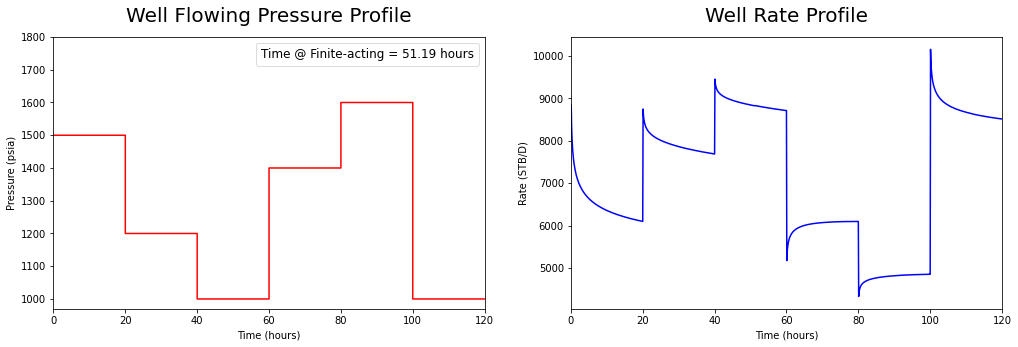

In [ ]:
# specify time step
t_step = 0.1

simulate_multipressure_test(p_initial, t_step, t_change, p_change, 
                            re, rw, perm, poro, mu, ct, Bo, h)

Now, change the porosity, permeability, compressibility, viscosity, reservoir size, and oil FVF. See their effects on the finite-acting time and the rate transient profile. Make the following cell your playground! 

Finite-acting time is 273.038 hours


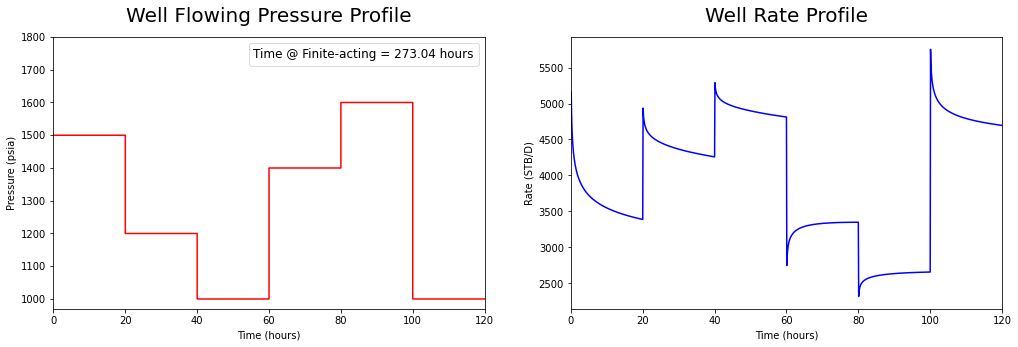

In [ ]:
# Inputs
poro = 0.4 # Porosity
ct = 12E-6 # Total compressibility, sip
perm = 300 # Permeability, md
rw = 4 * .08333 # Radius of wellbore, convert inch to ft
h = 32 # Reservoir thickness, ft
mu = 2 # Oil viscosity, cp
re = 3000 # Distance from centre of wellbore to outer reservoir boundary, ft
Bo = 1.33 # Oil FVF, RB/STB

p_initial = 2500 # Initial pressure, psia

# calculate finite-acting time
t_finite = time_finite_acting(perm, poro, mu, ct, rw, re)
t_finite = np.round(t_finite, 3) # round to 3 decimal places

print('Finite-acting time is {} hours'.format(t_finite))

# specify time step
t_step = 0.1

simulate_multipressure_test(p_initial, t_step, t_change, p_change, 
                            re, rw, perm, poro, mu, ct, Bo, h)

## BHP Data Processing and Visualization

We'll see a BHP data from the Volve Field (one of the wells, named well 15/9-F-1C). Load it first.

In [ ]:
# load Volve BHP data
filepath = '/content/pyreservoir/data/volve/Volve_BHP_15_9-F-1C.csv'
bhfp_df = pd.read_csv(filepath)

bhfp_df.head(10)

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE
0,07/04/2014,15/9-F-1 C,0.0,0.000,0.000
1,08/04/2014,15/9-F-1 C,0.0,NaN,NaN
2,09/04/2014,15/9-F-1 C,0.0,NaN,NaN
3,10/04/2014,15/9-F-1 C,0.0,NaN,NaN
4,11/04/2014,15/9-F-1 C,0.0,310.376,96.876
5,12/04/2014,15/9-F-1 C,0.0,303.501,96.923
6,13/04/2014,15/9-F-1 C,0.0,303.535,96.959
7,14/04/2014,15/9-F-1 C,0.0,303.782,96.969
8,15/04/2014,15/9-F-1 C,0.0,303.858,97.021
9,16/04/2014,15/9-F-1 C,0.0,303.792,97.066


You have learnt before that the date column should be converted to Pandas standard datetime format first. We need to look at how the date was written there: /DD/MM/YYYY

In [ ]:
# convert to Pandas standard datetime format
bhfp_df['DATEPRD'] = pd.to_datetime(bhfp_df['DATEPRD'], format='%d/%m/%Y')

bhfp_df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876
...,...,...,...,...,...
741,2016-04-17,15/9-F-1 C,0.0,270.268,101.198
742,2016-04-18,15/9-F-1 C,0.0,276.869,101.231
743,2016-04-19,15/9-F-1 C,0.0,282.105,101.178
744,2016-04-20,15/9-F-1 C,0.0,285.096,101.131


Now we make two plots, each for rate and pressure. For rate, use `plt.step` style; for pressure, use `plt.plot` style. Use subplots. 

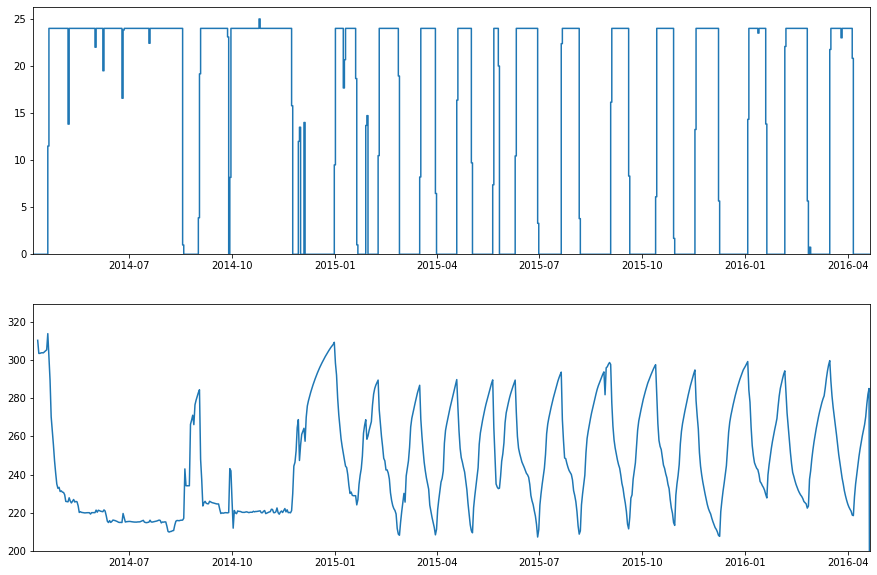

In [ ]:
# define variables for plotting
t = bhfp_df['DATEPRD'].values
q = bhfp_df['ON_STREAM_HRS'].values
p = bhfp_df['AVG_DOWNHOLE_PRESSURE'].values

plt.figure(figsize=(15,10))

# First plot: rate
plt.subplot(2,1,1)
plt.step(t, q)
plt.xlim(min(t), max(t))
plt.ylim(ymin=0)

# Second plot: BHP
plt.subplot(2,1,2)
plt.plot(t, p)
plt.xlim(min(t), max(t))
plt.ylim(ymin=200)

plt.show()

Zoom in to your interest. Adjust the `xlim`.

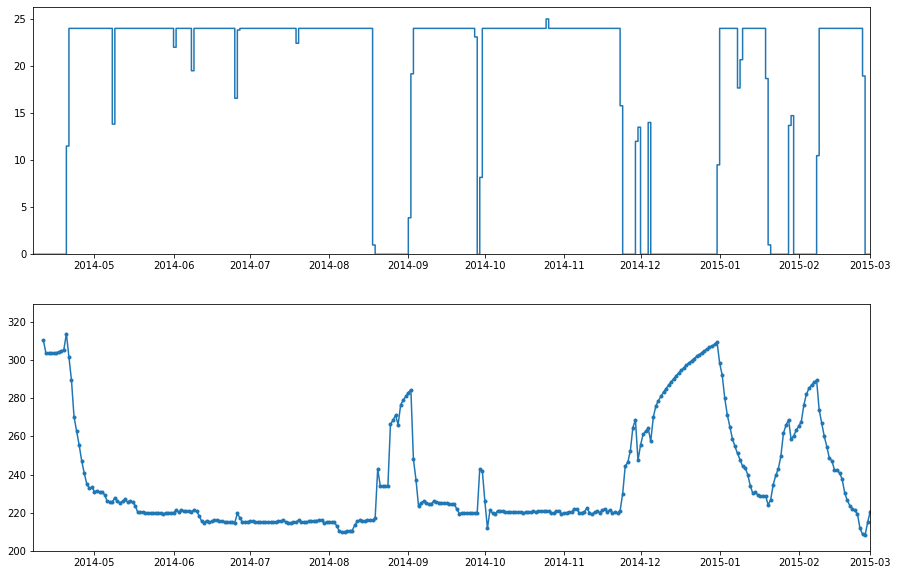

In [ ]:
# adjust the date to zoom in
min_t = min(t)
max_t = np.datetime64('2015-03-01')

plt.figure(figsize=(15,10))

# First plot: rate
plt.subplot(2,1,1)
plt.step(t, q)
plt.xlim(min_t, max_t)
plt.ylim(ymin=0)

# Second plot: BHP
plt.subplot(2,1,2)
plt.plot(t, p, '.-')
plt.xlim(min_t, max_t)
plt.ylim(ymin=200)

plt.show()

## Well test analysis

BHP data has been prepared for you, that contains a pressure drawdown from the beginning of test to hour 46, followed by a pressure buildup from hour 46 to hour 70. 

|Hours|Rate (STB/D)|
|:--:|:--:|
|$$0<t<46$$|1,000|
|$$46<t<70$$|0|

The reservoir has properties as listed below:
* 15% porosity
* Wellbore radius 0.333 ft
* Reservoir thickness 32 ft
* 12 microsip of total compressibility
* Reservoir initial pressure 3,500 psia (an estimate)
* 2 cp oil viscosity
* 1.33 RB/STB oil FVF

In [ ]:
# read BHP data for well-test analysis
bhp = pd.read_csv('/content/pyreservoir/data/welltest/drawdown+buildup.csv')

bhp

,t,p
0,0.000,2500.0
1,0.100,2388.3
2,0.200,2381.5
3,0.300,2377.5
4,0.400,2374.7
...,...,...
90,66.307,5834.0
91,67.323,5834.9
92,68.364,5835.8
93,69.430,5836.7


Plot the BHP data and give colors to separate drawdown and buildup.

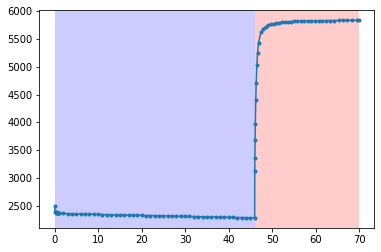

In [ ]:
# plot the BHP data and divide where to analyse drawdown and buildup
t = bhp['t'].values
p = bhp['p'].values

plt.plot(t, p, '.-')
plt.axvspan(min(t), 46, facecolor='blue', alpha=0.2)
plt.axvspan(46, max(t), facecolor='red', alpha=0.2)
plt.show()

Now, let's separate the dataframe, each for drawdown and buildup analysis. We will use mask (remember our session 3)

In [ ]:
# create mask for drawdown (<=46 hours) and buildup (>=46 hours)
mask_draw = bhp['t'] <= 46
mask_build = bhp['t'] >= 46

draw = bhp[mask_draw]
build = bhp[mask_build]

build.head(10)

,t,p
55,46.000,2278.4
56,46.020,3129.2
57,46.050,3357.5
58,46.100,3688.0
59,46.150,3967.0
60,46.250,4403.9
61,46.348,4712.3
62,46.500,5039.8
63,46.650,5244.3
64,46.880,5431.2


### Drawdown analysis

We will do analysis of pressure drawdown from hour 0 to hour 46. We'll use function `constant_rate_drawdown_test`.

In [ ]:
# see help
help(constant_rate_drawdown_test)

Help on function constant_rate_drawdown_test in module wellanalysis:

constant_rate_drawdown_test(t, p, q, Bo, mu_oil, h, poro, ct, rw, pi, your_guess=5)
    Analyzing Constant-Rate Well-test Result
    Note: Make your initial guess of the data index where LTR and MTR separate



List down all inputs.

In [ ]:
# list down all inputs

## time, rate, and pressure data
t_draw = draw['t'].values
p_draw = draw['p'].values
q = 1000 # STB/D 

## reservoir properties
poro = 0.15 # Porosity
rw = 0.333 # Wellbore radius, ft
h = 32 # Reservoir thickness, ft
ct = 12E-06 # Total compressibility, sip
pi = 3500 # Initial reservoir pressure, psia
mu_oil = 2 # Oil viscosity, cp
Bo = 1.333 # Oil FVF, RB/STB

Do the drawdown analysis. Pass without `your_guess` first. 

/content/pyreservoir/welltest/wellanalysis.py:94: RuntimeWarning: divide by zero encountered in log
  y_fit = m1 * np.log(t) + c1


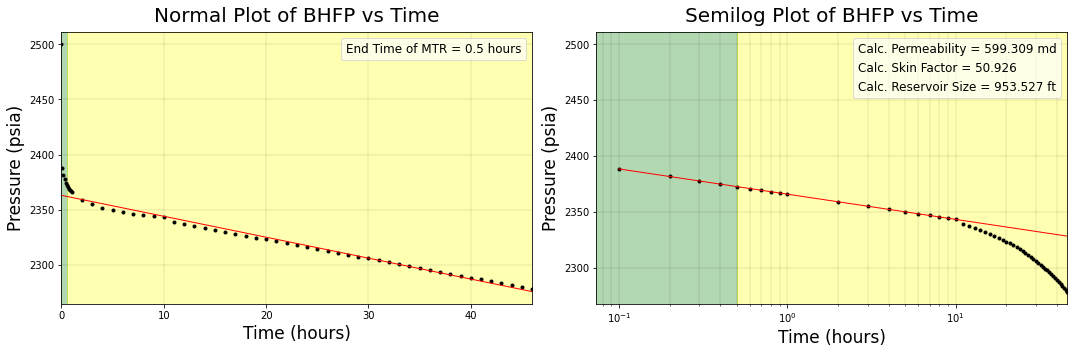

In [ ]:
# well-test analysis
constant_rate_drawdown_test(t_draw, p_draw, q, Bo, mu_oil, h, poro, ct, rw, pi)

It should look that MTR and LTR are not separated enough rightly. Now define yourselves where to separate it. Use `your_guess` and adjust it.  

/content/pyreservoir/welltest/wellanalysis.py:94: RuntimeWarning: divide by zero encountered in log
  y_fit = m1 * np.log(t) + c1


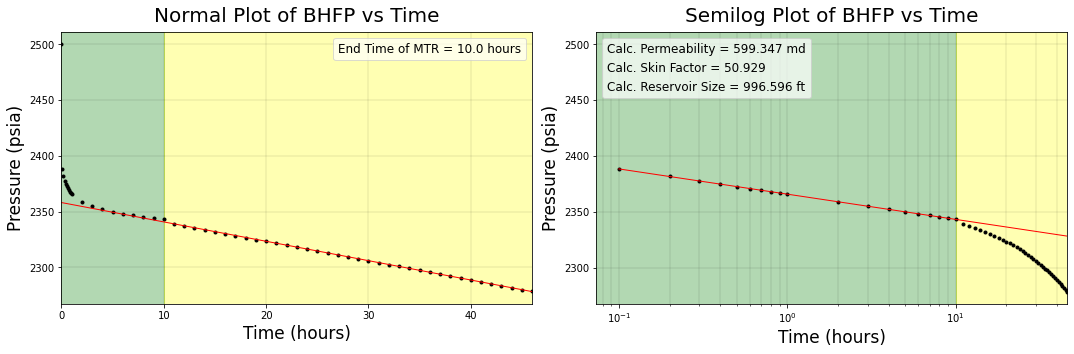

In [ ]:
# well-test analysis, use "your_guess"
constant_rate_drawdown_test(t_draw, p_draw, q, Bo, mu_oil, h, poro, ct, rw, pi, your_guess=19)

### Buildup analysis

For the buildup analysis, we analyze the portion of BHP data from hour 46 to hour 70. The reservoir is still the same. We'll use function `constant_rate_buildup_test`.

In [ ]:
# see help
help(constant_rate_buildup_test)

Help on function constant_rate_buildup_test in module wellanalysis:

constant_rate_buildup_test(t, p, q, Bo, mu_oil, h, poro, ct, rw, t_since_shutin, your_guess=5)
    Analyzing Constant Rate Buildup Well-test Result



List down all inputs. The reservoir properties have been defined before. We add here `t_since_shutin` as how long the test continues (since hour 0) before flow stopped. It was hour 46. 

In [ ]:
# list down all inputs

## define time, rate, and pressure
t_build = build['t'].values
p_build = build['p'].values
q = 1000 # STB/D

## define flow stopping time
t_since_shutin = 46

Now do the buildup analysis. Just like before we first use it without passing `your_guess`.

/content/pyreservoir/welltest/wellanalysis.py:319: RuntimeWarning: divide by zero encountered in true_divide
  x = (t_since_shutin + delta_t) / delta_t


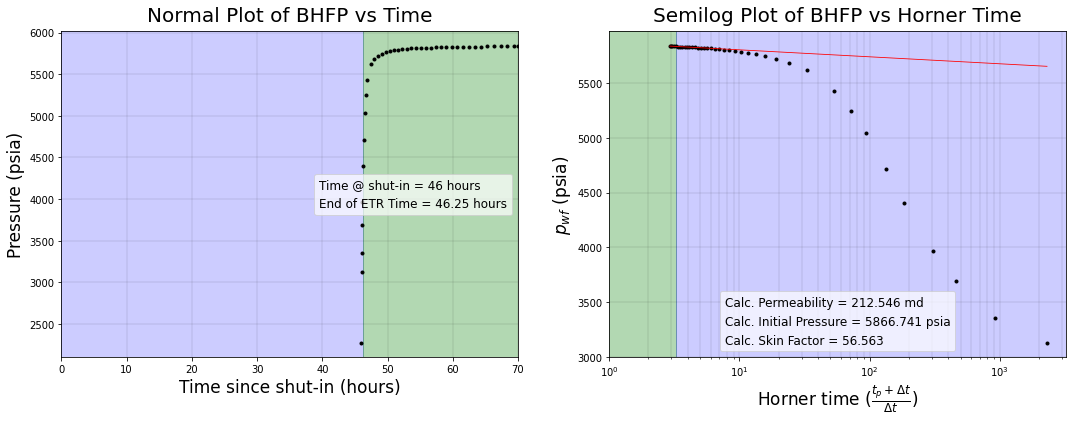

In [ ]:
# well-test analysis
constant_rate_buildup_test(t_build, p_build, q, Bo, mu_oil, h, poro, 
                           ct, rw, t_since_shutin)

It should look that ETR and MTR are not separated enough rightly. Now define yourselves where to separate it. Use `your_guess` and adjust it.  

/content/pyreservoir/welltest/wellanalysis.py:319: RuntimeWarning: divide by zero encountered in true_divide
  x = (t_since_shutin + delta_t) / delta_t


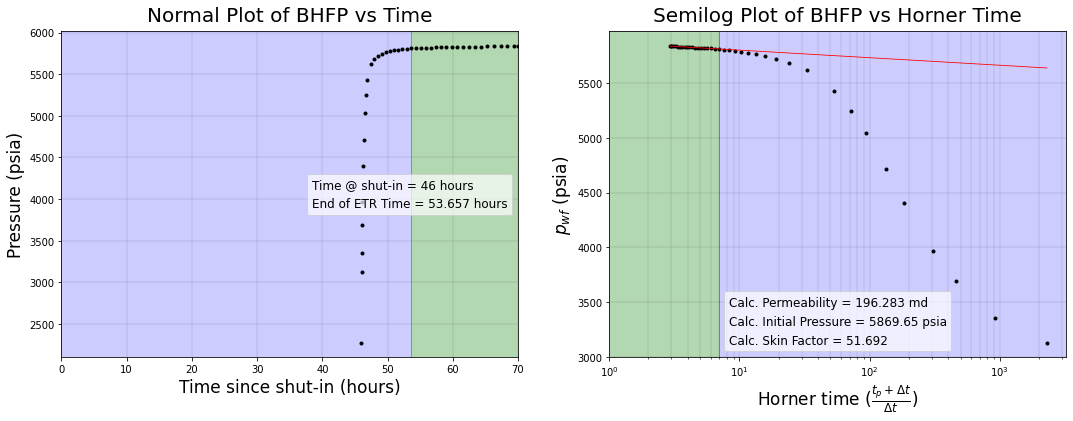

In [ ]:
# well-test analysis. Pass "your_guess"
constant_rate_buildup_test(t_build, p_build, q, Bo, mu_oil, h, poro, 
                           ct, rw, t_since_shutin, your_guess=20)

## End of Training!

Now we know how to:
* Simulate pressure and rate transient response from multirate and multiple pressure test
* Processing and visualization of borehole pressure (BHP) data
* Analysis of constant rate drawdown and buildup test

## Copyright

`PyReservoir` repository that stores all the functions and data, and this notebook, are copyrights of Yohanes Nuwara (2020). This notebook is contained in [this repository](https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers) You may freely distribute for self-study and tutorials, but you will consider the authorship of all the codes written here. 

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.